In [22]:
#TASK 1 : CREATING DATASET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
data = {
    "Study_Hours": [2, 3, 4, 5, 6, 7, 8, 1, 9, 10, 3, 4, 6, 7, 5],
    "Attendance": [60, 65, 70, 75, 80, 85, 90, 55, 92, 95, 68, 72, 88, 91, 77],
    "Sleep_Hours": [5, 6, 6, 7, 7, 8, 6, 4, 8, 7, 5, 6, 7, 8, 6],
    "Exam_Score": [50, 55, 60, 65, 70, 75, 85, 40, 90, 95, 58, 63, 78, 88, 68]
}

df = pd.DataFrame(data)

In [23]:
#TASK 2 : DATA EXPLORATION

print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nShape of dataset:")
print(df.shape)

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

First 5 rows:
   Study_Hours  Attendance  Sleep_Hours  Exam_Score
0            2          60            5          50
1            3          65            6          55
2            4          70            6          60
3            5          75            7          65
4            6          80            7          70

Last 5 rows:
    Study_Hours  Attendance  Sleep_Hours  Exam_Score
10            3          68            5          58
11            4          72            6          63
12            6          88            7          78
13            7          91            8          88
14            5          77            6          68

Shape of dataset:
(15, 4)

Data types:
Study_Hours    int64
Attendance     int64
Sleep_Hours    int64
Exam_Score     int64
dtype: object

Missing values:
Study_Hours    0
Attendance     0
Sleep_Hours    0
Exam_Score     0
dtype: int64


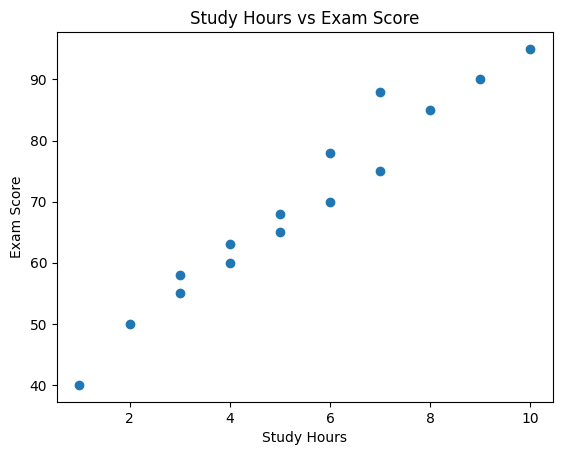

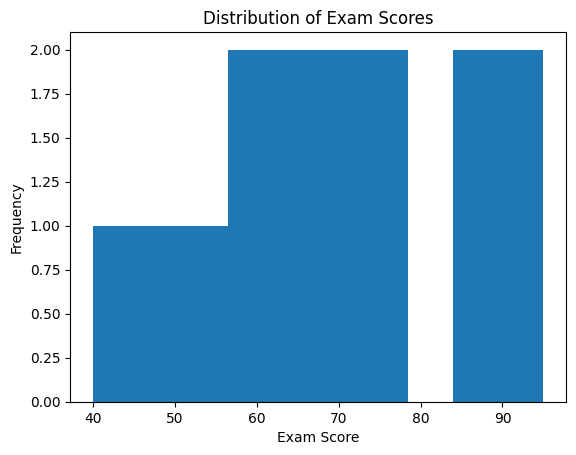

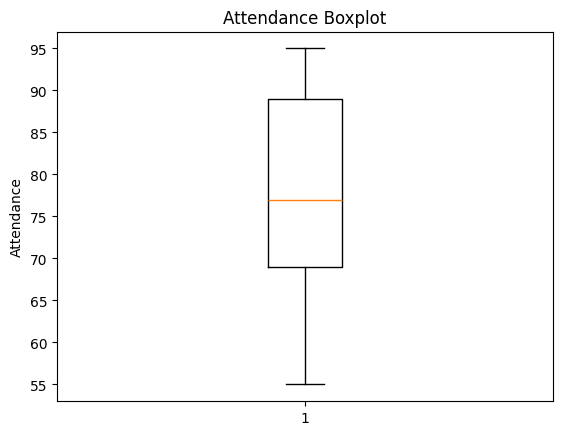

In [24]:
#TASK 3 : DATA VISUALIZATION

#SCATTER PLOT
plt.scatter(df["Study_Hours"], df["Exam_Score"])
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

#HISTOGRAM
plt.hist(df["Exam_Score"])
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

#BOXPLOT
plt.boxplot(df["Attendance"])
plt.title("Attendance Boxplot")
plt.ylabel("Attendance")
plt.show()

In [25]:
#TASK 4 : TRAIN LINEAR REGRESSION MODEL

#SPLIT DATA
X = df[["Study_Hours", "Attendance", "Sleep_Hours"]]
y = df["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#TRAIN MODEL
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#EVALUATION
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2 Score:", r2)

print("\n")
'''
The model shows a strong relationship between study hours, attendance and exam score.
The R² score indicates how well the model explains variance in exam scores.
A low MAE suggests predictions are close to actual values.
Overall, study hours and attendance positively influence performance.
'''



MAE: 2.277178959699441
R2 Score: 0.9842225719110174




'\nThe model shows a strong relationship between study hours, attendance and exam score.\nThe R² score indicates how well the model explains variance in exam scores.\nA low MAE suggests predictions are close to actual values.\nOverall, study hours and attendance positively influence performance.\n'

In [26]:
#TASK 5 : FEATURE EXPERIMENT

#REMOVE FEATURE (REMOVE SLEEP_HOURS)
X2 = df[["Study_Hours", "Attendance"]]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
print("R2 without Sleep_Hours:", r2_score(y_test2, y_pred2))

#ADD NEW FEATURE (ADD PRACTICE_TEST_SCORES)
df["Practice_Test_Score"] = [45, 50, 55, 60, 65, 70, 75, 35, 80, 85, 52, 58, 72, 78, 63]
X3 = df[["Study_Hours", "Attendance", "Sleep_Hours", "Practice_Test_Score"]]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42)
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)
print("R2 with new feature:", r2_score(y_test3, y_pred3))

print("\n")
'''
The model performance improved after adding Practice_Test_Score.
This suggests that practice performance is a strong indicator of final exam score.
Removing Sleep_Hours had little impact, meaning it is less important compared to study hours and attendance.
'''


R2 without Sleep_Hours: 0.9823521295431945
R2 with new feature: 0.9966344024386395




'\nThe model performance improved after adding Practice_Test_Score.\nThis suggests that practice performance is a strong indicator of final exam score.\nRemoving Sleep_Hours had little impact, meaning it is less important compared to study hours and attendance.\n'

In [27]:
#TASK 6 : OVERFITTING CHECK
model_full = LinearRegression()
model_full.fit(X, y)

y_full_pred = model_full.predict(X)

print("R2 on full dataset:", r2_score(y, y_full_pred))

print("\n")
'''
Overfitting occurs when a model learns the training data too well, including noise.
When trained on the full dataset, R² is usually very high.
However, this does not guarantee good performance on unseen data.
Proper train-test splitting helps evaluate real-world performance.
'''

R2 on full dataset: 0.9840285812985001




'\nOverfitting occurs when a model learns the training data too well, including noise.\nWhen trained on the full dataset, R² is usually very high.\nHowever, this does not guarantee good performance on unseen data.\nProper train-test splitting helps evaluate real-world performance.\n'